Dice Rolls = 2, Experiments = 100, Mean = 6.80, Variance = 5.78


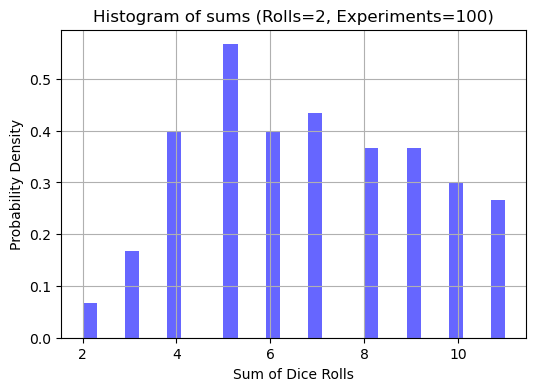

Dice Rolls = 2, Experiments = 500, Mean = 6.82, Variance = 5.95


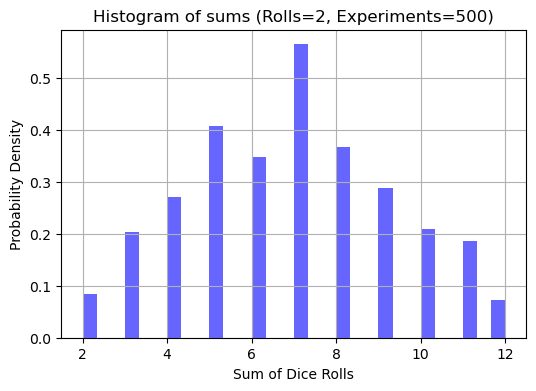

Dice Rolls = 2, Experiments = 1000, Mean = 6.89, Variance = 5.63


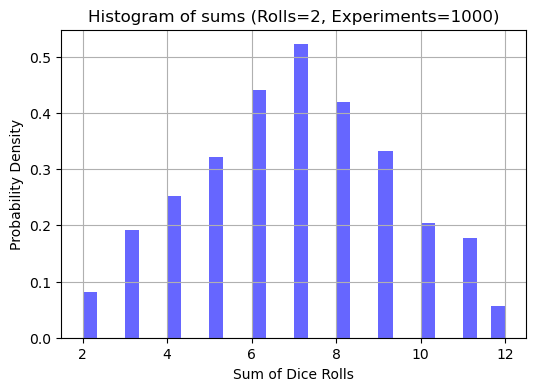

Dice Rolls = 2, Experiments = 5000, Mean = 7.00, Variance = 5.92


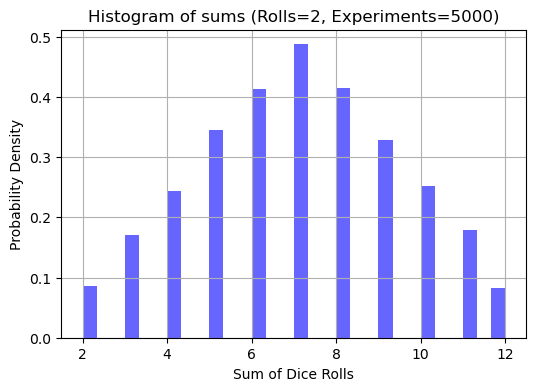

Dice Rolls = 2, Experiments = 10000, Mean = 7.01, Variance = 5.77


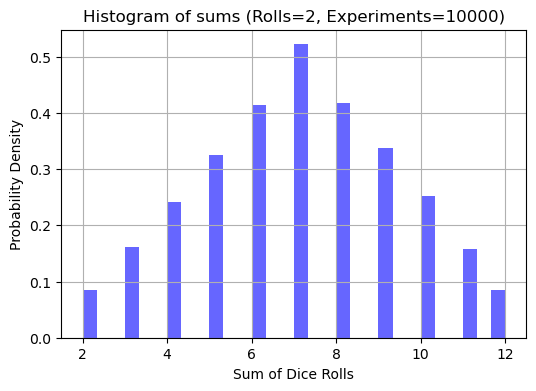

Dice Rolls = 2, Experiments = 50000, Mean = 6.99, Variance = 5.83


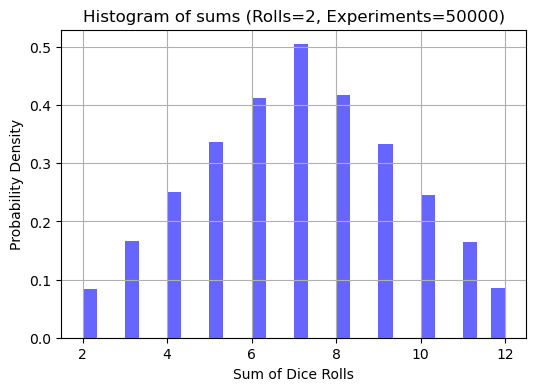

Dice Rolls = 2, Experiments = 100000, Mean = 7.00, Variance = 5.82


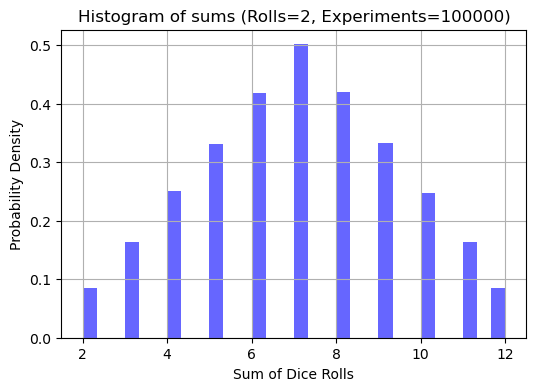

Dice Rolls = 3, Experiments = 100, Mean = 10.25, Variance = 8.53


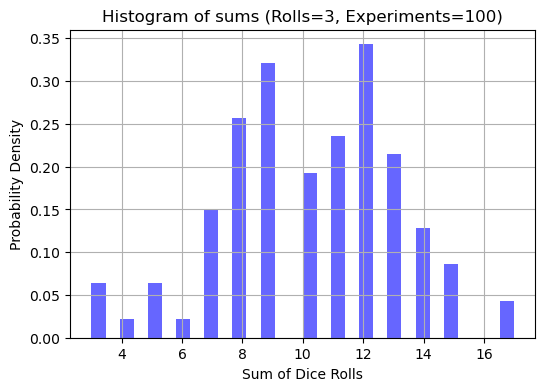

Dice Rolls = 3, Experiments = 500, Mean = 10.59, Variance = 8.68


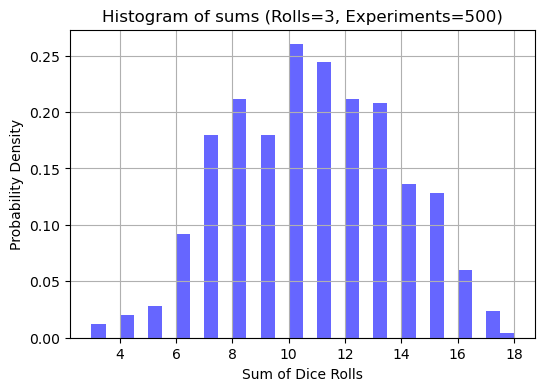

Dice Rolls = 3, Experiments = 1000, Mean = 10.42, Variance = 8.79


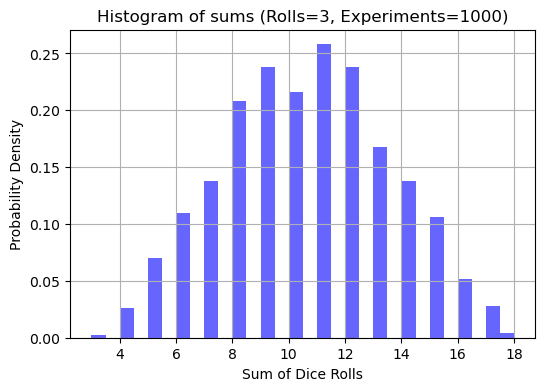

Dice Rolls = 3, Experiments = 5000, Mean = 10.55, Variance = 8.57


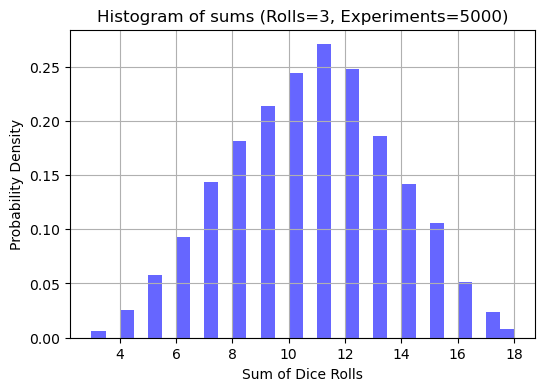

Dice Rolls = 3, Experiments = 10000, Mean = 10.50, Variance = 8.63


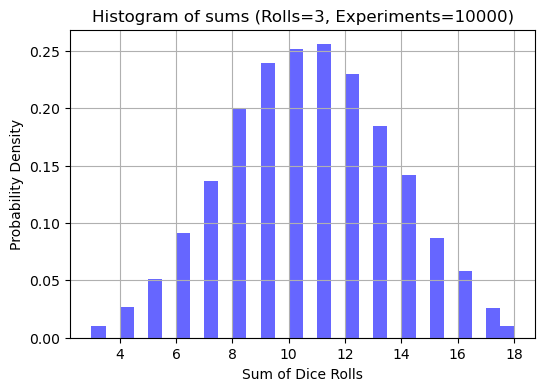

Dice Rolls = 3, Experiments = 50000, Mean = 10.52, Variance = 8.70


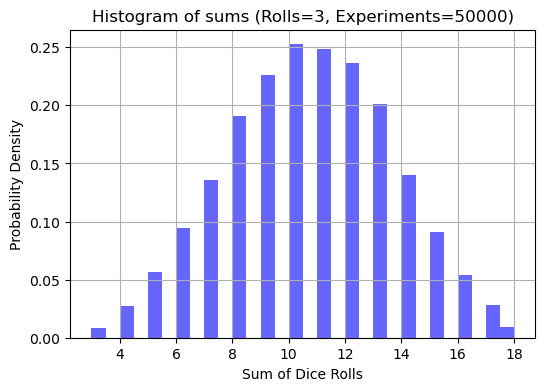

Dice Rolls = 3, Experiments = 100000, Mean = 10.51, Variance = 8.78


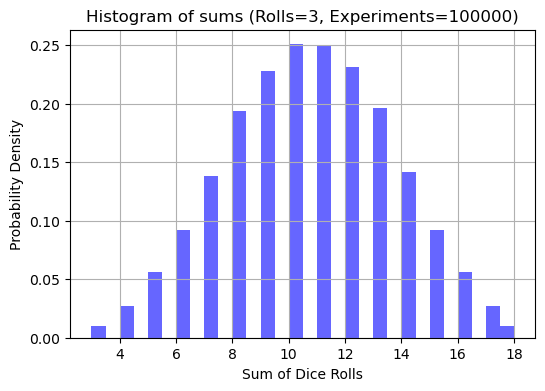

Dice Rolls = 5, Experiments = 100, Mean = 17.27, Variance = 14.64


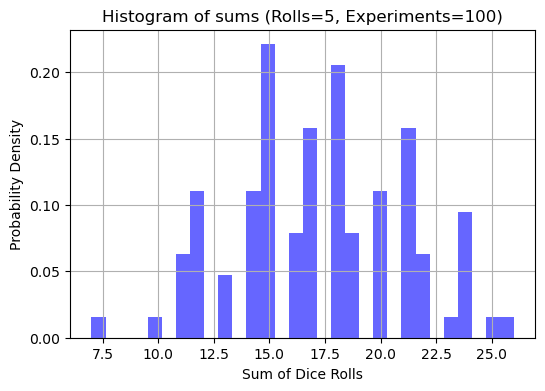

Dice Rolls = 5, Experiments = 500, Mean = 17.58, Variance = 13.90


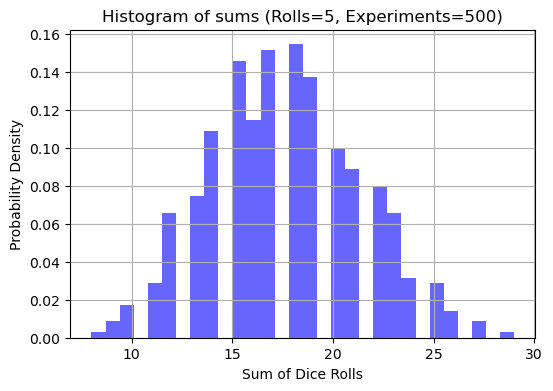

Dice Rolls = 5, Experiments = 1000, Mean = 17.66, Variance = 14.25


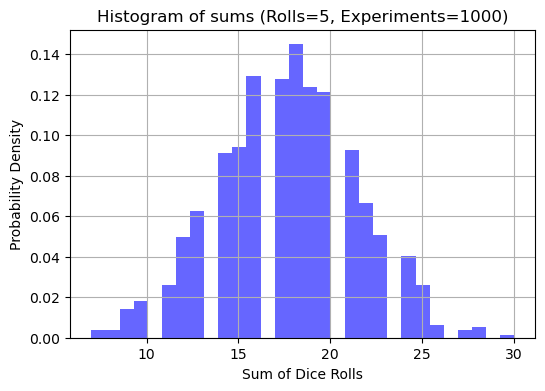

Dice Rolls = 5, Experiments = 5000, Mean = 17.52, Variance = 14.57


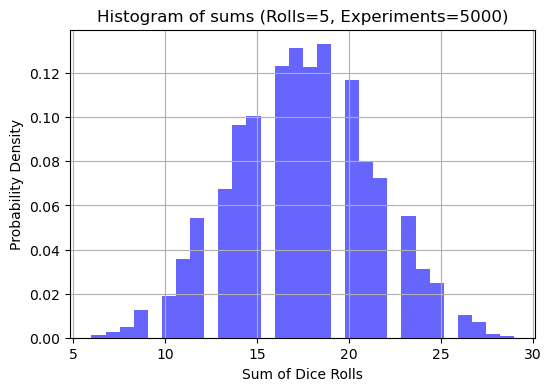

Dice Rolls = 5, Experiments = 10000, Mean = 17.40, Variance = 14.94


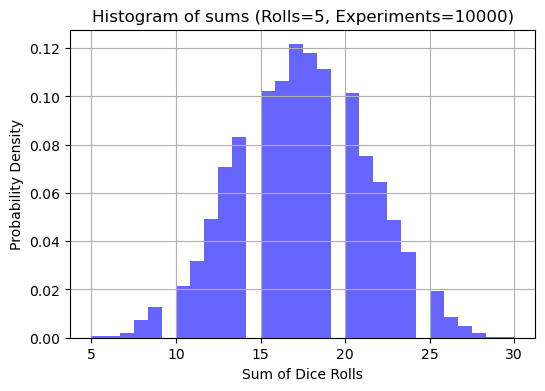

Dice Rolls = 5, Experiments = 50000, Mean = 17.50, Variance = 14.57


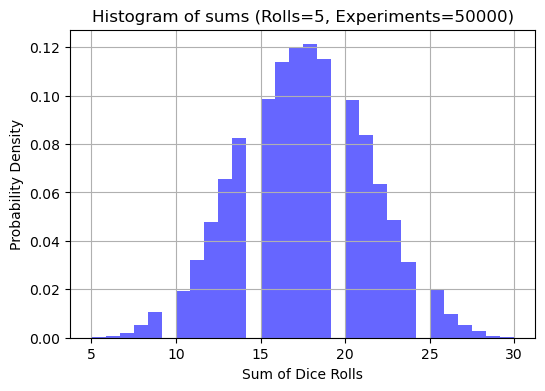

Dice Rolls = 5, Experiments = 100000, Mean = 17.51, Variance = 14.51


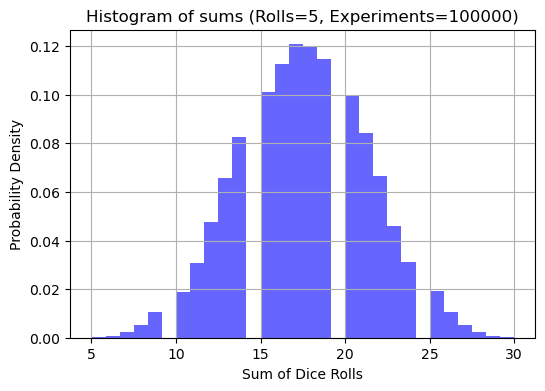

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def dice_simulation(num_rolls, num_experiments):
    rolls = np.random.randint(1, 7, size=(num_experiments, num_rolls))
    sums = rolls.sum(axis=1)
    return sums

experiment_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

for num_rolls in [2, 3, 5]:
    for size in experiment_sizes:
        sums = dice_simulation(num_rolls, size)
        mean, var = np.mean(sums), np.var(sums)
        print(f"Dice Rolls = {num_rolls}, Experiments = {size}, Mean = {mean:.2f}, Variance = {var:.2f}")

        plt.figure(figsize=(6,4))
        plt.hist(sums, bins=30, density=True, alpha=0.6, color='b')
        plt.title(f"Histogram of sums (Rolls={num_rolls}, Experiments={size})")
        plt.xlabel("Sum of Dice Rolls")
        plt.ylabel("Probability Density")
        plt.grid(True)
        plt.show()


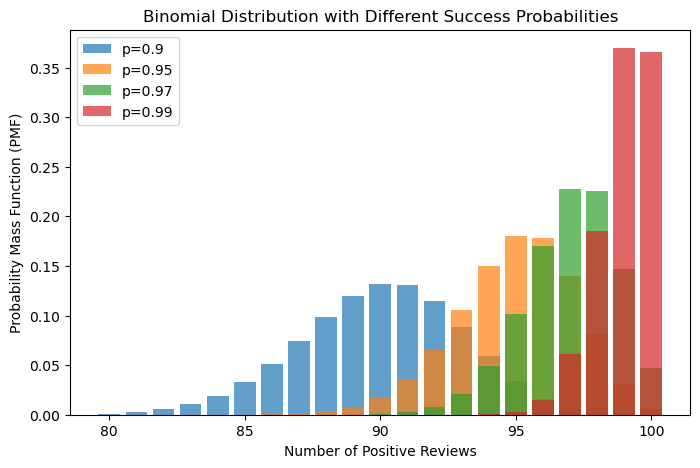

Estimated success rate (MLE) = 0.97


In [5]:
from scipy.stats import binom

n = 100  # number of trials (reviews)
k = 97   # successes (positive reviews)
p_values = [0.90, 0.95, 0.97, 0.99]

x = np.arange(80, 101)

plt.figure(figsize=(8,5))
for p in p_values:
    probs = binom.pmf(x, n, p)
    plt.bar(x, probs, alpha=0.7, label=f"p={p}")

plt.title("Binomial Distribution with Different Success Probabilities")
plt.xlabel("Number of Positive Reviews")
plt.ylabel("Probability Mass Function (PMF)")
plt.legend()
plt.show()

p_hat = k / n
print(f"Estimated success rate (MLE) = {p_hat:.2f}")


In [9]:
import pandas as pd
from scipy.stats import entropy

adv = pd.read_csv("advertising.csv")
house = pd.read_csv("Housing.csv")
faa = pd.read_csv("faa_ai_prelim.csv")

datasets = {"Advertising": adv, "Housing": house, "FAA": faa}

def column_entropy(series, bins=10):
    if series.dtype == 'object' or series.dtype == 'bool':
        counts = series.value_counts(normalize=True)
    else:
        counts, _ = np.histogram(series.dropna(), bins=bins)
        counts = counts / counts.sum() if counts.sum() > 0 else counts
    return entropy(counts, base=2)

for name, df in datasets.items():
    print(f"\nDataset: {name}")
    for col in df.columns:
        try:
            ent = column_entropy(df[col])
            print(f"Column: {col}, Entropy: {ent:.4f}")
        except Exception as e:
            print(f"Column: {col}, skipped due to error: {e}")


Dataset: Advertising
Column: TV, Entropy: 3.2985
Column: Radio, Entropy: 3.2896
Column: Newspaper, Entropy: 2.7522
Column: Sales, Entropy: 3.0530

Dataset: Housing
Column: price, Entropy: 2.5584
Column: area, Entropy: 2.4166
Column: bedrooms, Entropy: 1.5784
Column: bathrooms, Entropy: 0.9448
Column: stories, Entropy: 1.6013
Column: mainroad, Entropy: 0.5876
Column: guestroom, Entropy: 0.6756
Column: basement, Entropy: 0.9345
Column: hotwaterheating, Entropy: 0.2686
Column: airconditioning, Entropy: 0.8995
Column: parking, Entropy: 1.5476
Column: prefarea, Entropy: 0.7864
Column: furnishingstatus, Entropy: 1.5573

Dataset: FAA
Column: UPDATED, Entropy: 0.2243
Column: ENTRY_DATE, Entropy: 2.7897
Column: EVENT_LCL_DATE, Entropy: 3.8502
Column: EVENT_LCL_TIME, Entropy: 6.1973
Column: LOC_CITY_NAME, Entropy: 6.2787
Column: LOC_STATE_NAME, Entropy: 4.3330
Column: LOC_CNTRY_NAME, Entropy: 0.0000
Column: RMK_TEXT, Entropy: 6.3268
Column: EVENT_TYPE_DESC, Entropy: 0.9101
Column: FSDO_DESC, En